In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pysindy as ps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from functions import Rossler, Solution, MI, FNN
from sindy_utils import sindy_library

In [10]:
a, b, c = 0.15, 0.2, 10
h = np.pi/100
t = np.arange(0,100,h)
n = len(t)
x0 =[0.1,1,0.1]
xs,ys,zs = Solution(Rossler, x0, t, [a,b,c])

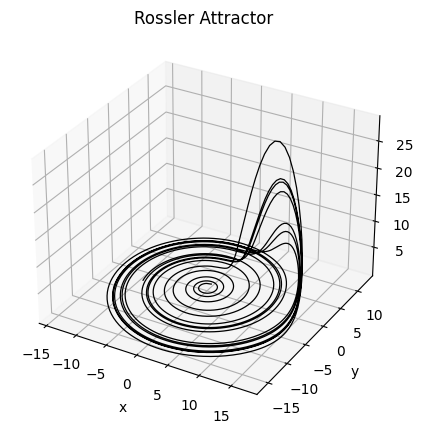

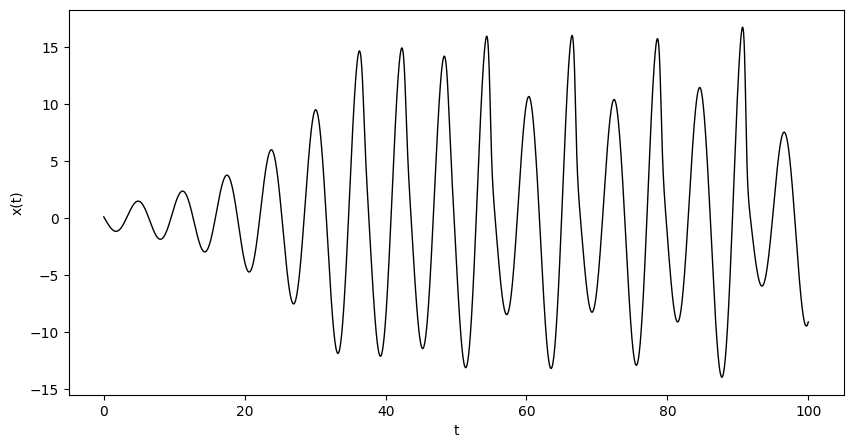

In [11]:
fig = plt.figure(figsize=(5, 9))
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot(xs, ys, zs, lw=.9, color= 'k')
ax3d.set_title("Rossler Attractor")
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel("z")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, xs, lw=1, color="k")
ax.set_ylabel("x(t)")
ax.set_xlabel("t")
plt.show()

τ = 17
[17, 19, 24, 28, 31, 33, 35, 37, 40, 42, 44, 46, 49, 52, 54, 57, 60, 62, 67, 69, 71, 73, 75, 77, 82, 100, 112, 114, 116, 121, 128, 131, 133, 137, 139, 142, 145, 148, 150, 152, 155, 158, 160, 162, 166, 168, 171, 177, 179, 181, 183, 185, 193, 200, 210, 217, 219, 222, 224, 226, 229, 231, 236, 239, 241, 243, 245, 247, 249, 252, 254, 257, 261, 265, 270, 276, 278, 282, 286, 289, 293, 295, 297, 301, 306, 310, 313, 315, 320, 324, 327, 329, 332, 336, 338, 341, 344, 346, 348, 351, 354, 356, 359, 361, 363, 372, 374, 377, 381, 385, 393, 396]


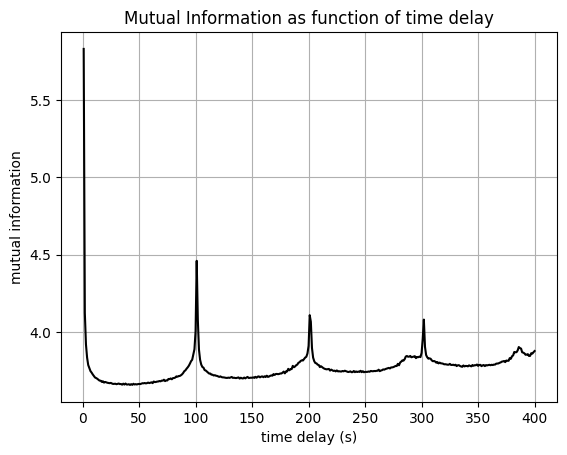

In [12]:
MI_vals = []
n = len(xs)
for i in range(400):
    v1 = xs[0: n - i]
    v2 = xs[i : n]
    MI_vals.append(MI(v1, v2, 400))

opt_index = []
opt_mi = []

for i in range(1, len(MI_vals)-1):
    if MI_vals[i] > MI_vals[i-1] and MI_vals[i] > MI_vals[i+1]:
        opt_index.append(i)
        opt_mi.append(MI_vals[i])

tau = opt_index[0]
print("τ =", tau)
print(opt_index)

plt.plot(np.arange(1,len(MI_vals)+1), MI_vals, color = 'k')
plt.xlabel('time delay (s)')
plt.ylabel('mutual information')
plt.title("Mutual Information as function of time delay")
plt.grid()
plt.show()

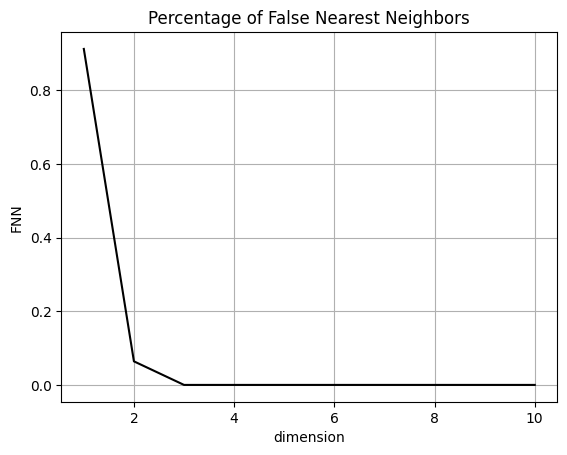

k = 3


In [ ]:
eps = 0.5
k_vals = np.arange(1, 11)

per = FNN(xs, k_vals, eps, tau)
plt.plot(k_vals, per, color = 'k')
plt.grid()
plt.title("Percentage of False Nearest Neighbors")
plt.ylabel("FNN")
plt.xlabel("dimension")
plt.show()

print("k = 3")

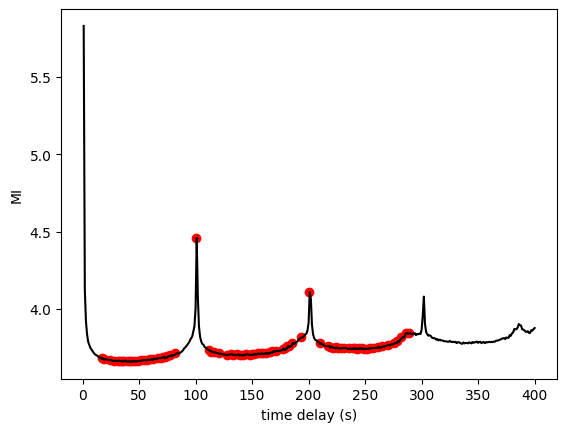

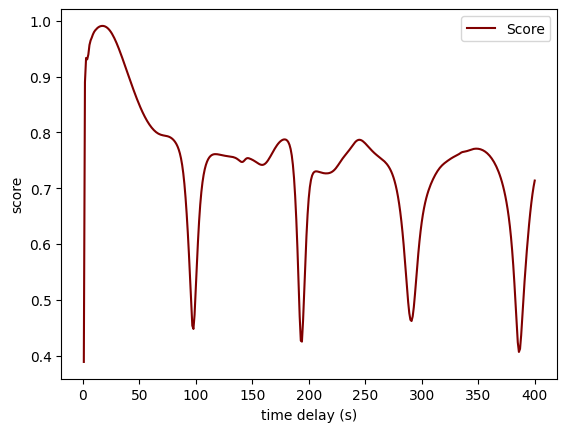

In [18]:
score_vals = []
opt = opt_index[:80]
for tau in range(400):
    v1 = xs[0: len(xs) - 2*tau] #x(t)
    v2 = xs[tau: len(xs) - tau] #x(t + τ)
    v3 = xs[2*tau: len(xs)] #x(t + 2τ)

    v = np.array([v1, v2, v3]).T
    x = np.array([xs[:len(v1)], ys[:len(v1)], zs[:len(v1)]]).T
    Phi = sindy_library(v,2)
    model = Lasso(alpha=1e-2, max_iter= 100000, fit_intercept=False)
    model.fit(Phi, x)
    sol = model.predict(Phi)
    score = model.score(Phi, x)
    score_vals.append(score)


plt.plot(np.arange(1,len(MI_vals)+1), MI_vals, color = 'k')
plt.scatter(opt, opt_mi[:len(opt)], color = 'r')
plt.ylabel("MI")
plt.xlabel('time delay (s)')
plt.show()
plt.plot(np.arange(1,len(MI_vals)+1), score_vals, label = "Score", color = 'maroon')
plt.legend()
plt.xlabel('time delay (s)')
plt.ylabel("score")
plt.show()